# Practical Task 1 of T21

Implementating bagged, random forest, boosted tree in Titanic dataset

In [1]:
# Import all libraries for calculation
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# for visualisation
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [3]:
# For Baggged, RandomForest, and Boost Tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
# Load Titanic data
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
# PassengerId, Name and Ticket are irrelavant also, so drop them as well
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

In [6]:
# Seperate Sex into Boolean value 
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Fill NA values with the mean value to reduce disturbrance, which is 29.69
titanic_df.Age.fillna(29.69, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_40544\1363651824.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df.Age.fillna(29.69, inplace=True)


In [8]:
# Seperate Embarkment into Boolean value 
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

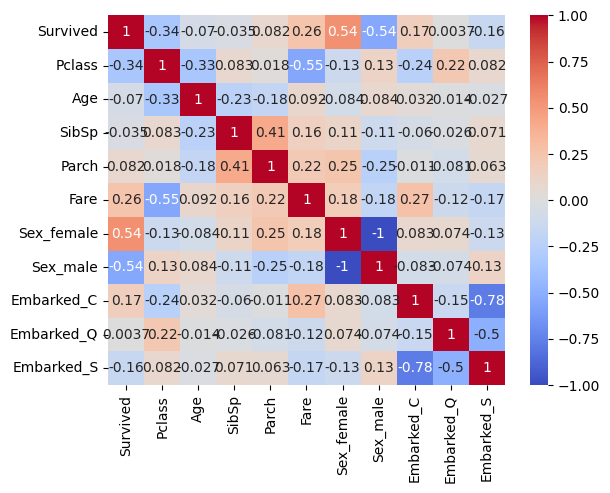

In [9]:
# Study correlation
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')

# Initial Analysis
Survived will be the target result for prediction, so it will be used as y
Sex_female and Sex_male are mutual exclusive, so select only one and drop another.

In [10]:
# Remove duplicate column
titanic_df.drop("Sex_female", axis=1, inplace=True)

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

#### Start building bagged, random forest and boost tree 
Initially, n-estimator will set as 100 
test size will be 30% and training set will be 70%
max depth will be 20

In [11]:
# Create different control variable for the testing

# Create constant for random seed
r_seed = 852

# Create variable for maximum tree depth
max_depth = 20

# Create variable for n estimator
n_estimators = 100

# Create variable for n feature, which is 9 from the data set
n_feature = 9

# Create variable for n informative, which i choose 3 as there is three prominent feature from correlation with Survived
n_informative = 3

# Create variable for test_size, which is 0.3 for Training 70%, test 30%
test_size = 0.3

In [12]:
# Prepare the train and test dataset for bagged model and AdaboostTree according to the pre-set test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 

### Bagged 

In [13]:
# Create bagged model according to the n_estimators and and max_depth
base = DecisionTreeClassifier(max_depth=max_depth, random_state=r_seed)
ensemble = BaggingClassifier(estimator=base, n_estimators=n_estimators, random_state=r_seed)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Bagged Accuracy base:",base.score(X_test, y_test))
print("Bagged Accuracy ensemble:",ensemble.score(X_test, y_test))

Bagged Accuracy base: 0.7574626865671642
Bagged Accuracy ensemble: 0.8134328358208955


### Random Forest

In [14]:
# Build Random Forest according to the n_estimators and and max_depth
forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=r_seed)
forest.fit(X_train, y_train)

# Find the important features
feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

4    0.269371
5    0.268846
1    0.250129
0    0.074626
2    0.050101
3    0.036099
8    0.025359
6    0.017635
7    0.007834
dtype: float64

### Contributing model in Random Forest

From the random forest results, the features in 1 (Age) is the most effective feature for the survived. And followed by 5 (Sex_male) and 4 (Fare), so i choose these three feature for reducing noise for the Random tree

In [15]:
# select important features by Random Forest Importances
X_forest = X.iloc[:,[5,4,1]]

# Retrain and prepare the train and test dataset for random forest according to the pre-set test size 
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y, test_size=test_size) # According to pre-set test size
forest.fit(X_forest_train,y_forest_train)

print("Random Forest Accuracy:",forest.score(X_forest_test, y_forest_test))

Random Forest Accuracy: 0.7611940298507462


### Boosted Tree 
Adapting Ada Boost Classifier for Boosted Tree with learning rate 1 and Algorithm SAMME

In [16]:
# Build Ada Boosted Tree according to the n_estimators and and max_depth by using the base with Bagged model
ada = AdaBoostClassifier(estimator=base,n_estimators=n_estimators,learning_rate=1,algorithm='SAMME', random_state=r_seed)
ada.fit(X_train,y_train)

print("Ada Boosted Tree Accuracy:",ada.score(X_test, y_test))

Ada Boosted Tree Accuracy: 0.7910447761194029


### Intermeidate Record for n-estimator 100 and max depth 20
In n-Esimator 100 and max depth 20 setting
#### Bagged model:
Base score: 0.7574626865671642
Score: 0.8134328358208955
#### Random Forest:
Score: 0.7611940298507462
#### Boosted Tree:
Score: 0.7910447761194029

### Investigate the max depth and n-estimator

In [17]:
# Investigate for the max depth with n-estimator 100
max_depth=20

# Set the depth test from 1 to 21
depths_test = range(1,max_depth+1)

# Set arrays to collect testing scores
bagged_base = [] 
bagged_ensemble = [] 
forest_ensemble = [] 
ada_ensemble = []

# Set testing n_estimators to 100
n_estimators = 100

# Prepare the train and test dataset for bagged model and AdaboostTree according to the pre-set test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 

# Prepare the train and test dataset for Random Forest according to the pre-set test size
X_forest = X.iloc[:,[5,4,1]]
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y, test_size=test_size) 

# Start looping from 1 to 20 and seeking each result from different model with n-estimators = 100
for d in depths_test:

    # Build Bagged model and Ada Boosted Tree according to the n_estimators and each depth
    base = DecisionTreeClassifier(max_depth=d,  random_state=r_seed)
    ensemble = BaggingClassifier(estimator=base, n_estimators=n_estimators, random_state=r_seed)
    ada = AdaBoostClassifier(estimator=base, n_estimators=n_estimators,learning_rate=1,algorithm='SAMME', random_state=r_seed)

    # Fit the train dataset to Bagged model and AdaBoostTree in the corresponding tree depth
    base.fit(X_train,y_train)
    ensemble.fit(X_train,y_train)
    ada.fit(X_train,y_train)

    # Record the score from  Bagged model and AdaBoostTree
    bagged_base.append(base.score(X_test, y_test))
    bagged_ensemble.append(ensemble.score(X_test, y_test))
    ada_ensemble.append(ada.score(X_test, y_test))

    # Build Random Forest according to the n_estimators and each depth
    forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=d, random_state=r_seed)
    
    # Fit the train dataset to Random Forest in the corresponding tree depth
    forest.fit(X_forest_train, y_forest_train)

    # Record the score from Random Forest
    forest_ensemble.append(forest.score(X_forest_test, y_forest_test))

# End of Loop

bagged_best_depth = depths_test[np.argmax(bagged_ensemble)]
forest_best_depth = depths_test[np.argmax(forest_ensemble)]
ada_best_depth = depths_test[np.argmax(ada_ensemble)]
print(f'Best performance of Bagged with n-estimators {n_estimators} reached at depth of: {str(bagged_best_depth)} @ {str(np.max(bagged_ensemble))}')
print(f'Best performance of Random Forest with n-estimators {n_estimators} reached at depth of: {str(forest_best_depth)} @ {str(np.max(forest_ensemble))}')
print(f'Best performance of Boosted Tree with n-estimators {n_estimators} reached at depth of: {str(ada_best_depth)} @ {str(np.max(ada_ensemble))}')


Best performance of Bagged with n-estimators 100 reached at depth of: 6 @ 0.832089552238806
Best performance of Random Forest with n-estimators 100 reached at depth of: 5 @ 0.7761194029850746
Best performance of Boosted Tree with n-estimators 100 reached at depth of: 2 @ 0.8283582089552238


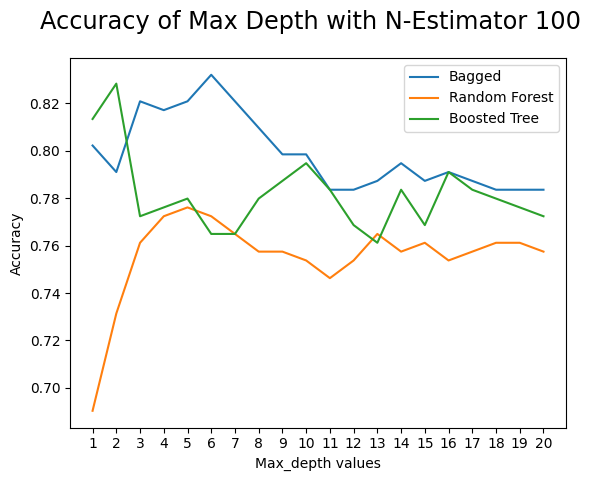

In [18]:
# Plot graph to compare development set and training set accurary according to the depth
subtitle = "Accuracy of Max Depth with N-Estimator " + str(n_estimators)
fig, ax = plt.subplots()
line1, = ax.plot(depths_test, bagged_ensemble, label='Bagged')
line2, = ax.plot(depths_test, forest_ensemble, label='Random Forest')
line3, = ax.plot(depths_test, ada_ensemble, label='Boosted Tree')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(depths_test)
ax.legend(handles=[line1, line2, line3])
plt.suptitle(subtitle, fontsize='xx-large')
plt.show()

From the graph above, Bagged and Boost Tree have better accuracy result than Random Forest, so I choose Boosted Tree for further observation on the N-Estimators.

In [19]:
# Investigate for the n-estimator with best max depth from previous calculation i boosted tree

# Set the max_depth equals to the best depth from Ada boosted Tree
max_depth=ada_best_depth

# Set the steps of loop to 1
steps = 1

# Set the range of n-estimators test from 1 to 200
n_est_test = range(1,200+steps,steps)

# Set the arrays to collect testing score 
bagged_base = [] 
bagged_ensemble = [] 
forest_ensemble = [] 
ada_ensemble = [] 

# Prepare the train and test dataset for bagged model and AdaboostTree according to the pre-set test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 

# Prepare the train and test dataset for Random Forest according to the pre-set test size
X_forest = X.iloc[:,[5,4,1]]
X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y, test_size=test_size) 

# Start looping from 1 to 200 and seeking each result from different depth in 3
for n in n_est_test:

    # Build Bagged model and Ada Boosted Tree according to the n_estimators and each n-estimators
    base = DecisionTreeClassifier(max_depth=max_depth,  random_state=r_seed)
    ensemble = BaggingClassifier(estimator=base, n_estimators=n, random_state=r_seed)
    ada = AdaBoostClassifier(estimator=base, n_estimators=n,learning_rate=1,algorithm='SAMME', random_state=r_seed)
    
    # Fit the train dataset to Bagged model and AdaBoostTree in the corresponding n-estimators
    base.fit(X_train,y_train)
    ensemble.fit(X_train,y_train)
    ada.fit(X_train,y_train)

    # Record the score from  Bagged model and AdaBoostTree
    bagged_base.append(base.score(X_test, y_test))
    bagged_ensemble.append(ensemble.score(X_test, y_test))
    ada_ensemble.append(ada.score(X_test, y_test))

    # Build Random Forest according to the n_estimators and each n-estimators
    forest = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=r_seed)

    # Fit the train dataset to Random Forest in the corresponding tree depth
    forest.fit(X_forest_train, y_forest_train)

    # Record the score from Random Forest
    forest_ensemble.append(forest.score(X_forest_test, y_forest_test))

# End of Loop

bagged_best_n_est = n_est_test[np.argmax(bagged_ensemble)]
forest_best_n_est = n_est_test[np.argmax(forest_ensemble)]
ada_best_n_est = n_est_test[np.argmax(ada_ensemble)]
print(f'Best performance of Bagged with Max Depth {str(max_depth)} reached at n-estimators of:{str(bagged_best_n_est)} @ {str(np.max(bagged_ensemble))}')
print(f'Best performance of Random Forest with Max Depth {str(max_depth)} reached at n-estimators of:{str(forest_best_n_est)} @ {str(np.max(forest_ensemble))}')
print(f'Best performance of Boosted Tree with Max Depth {str(max_depth)} reached at n-estimators of:{str(ada_best_n_est)} @ {str(np.max(ada_ensemble))}')


Best performance of Bagged with Max Depth 2 reached at n-estimators of:7 @ 0.8134328358208955
Best performance of Random Forest with Max Depth 2 reached at n-estimators of:13 @ 0.7798507462686567
Best performance of Boosted Tree with Max Depth 2 reached at n-estimators of:5 @ 0.8246268656716418


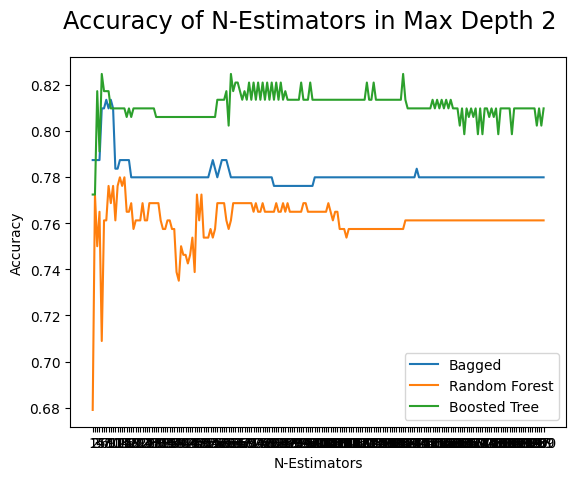

In [20]:
# Plot graph to compare development set and training set accurary according to the depth
subtitle = "Accuracy of N-Estimators in Max Depth " + str(max_depth)
fig, ax = plt.subplots()
line1, = ax.plot(n_est_test, bagged_ensemble, label='Bagged')
#ax2.plot(pruned_depths_dev, pruned_scores_dev)
line2, = ax.plot(n_est_test, forest_ensemble, label='Random Forest')
line3, = ax.plot(n_est_test, ada_ensemble, label='Boosted Tree')
plt.xlabel("N-Estimators")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(n_est_test)
ax.legend(handles=[line1, line2, line3])
plt.suptitle(subtitle, fontsize='xx-large')
plt.show()

### Conclusion 

By the above graph, the best setting for Boosted Tree is n-estimator 5 with max depth 2, which the accuracy is near 0.825, which is higher than the default n-estimator 100 with depth 20.

It is generally higher accuracy than bagged and random forest. So it should be more suitable for Titanic dataset and can have higher accuracy with further tuning. And it seems that in the setting of depth 2, the n-estimator effect will not increase further in all bagged, random forest and boosted tree. 